In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, ttest_rel

plt.rcParams["figure.figsize"] = (16, 9)
sns.set(rc={'figure.figsize': (16, 9)})  # чтобы графики были больше

Данные по зарплатам Data Scientists. [Ссылка.](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

В ходе анализа датасета планируется ответить на следующие вопросы:  
  
  1. Как распределена зарплата Data Scientists по миру?  
  2. В Англии средняя зарплата у Data Scientists такая же, как в Германии?  
  3. В компаниях среднего размера средняя зарплата такая же, как в компаниях большого размера?  

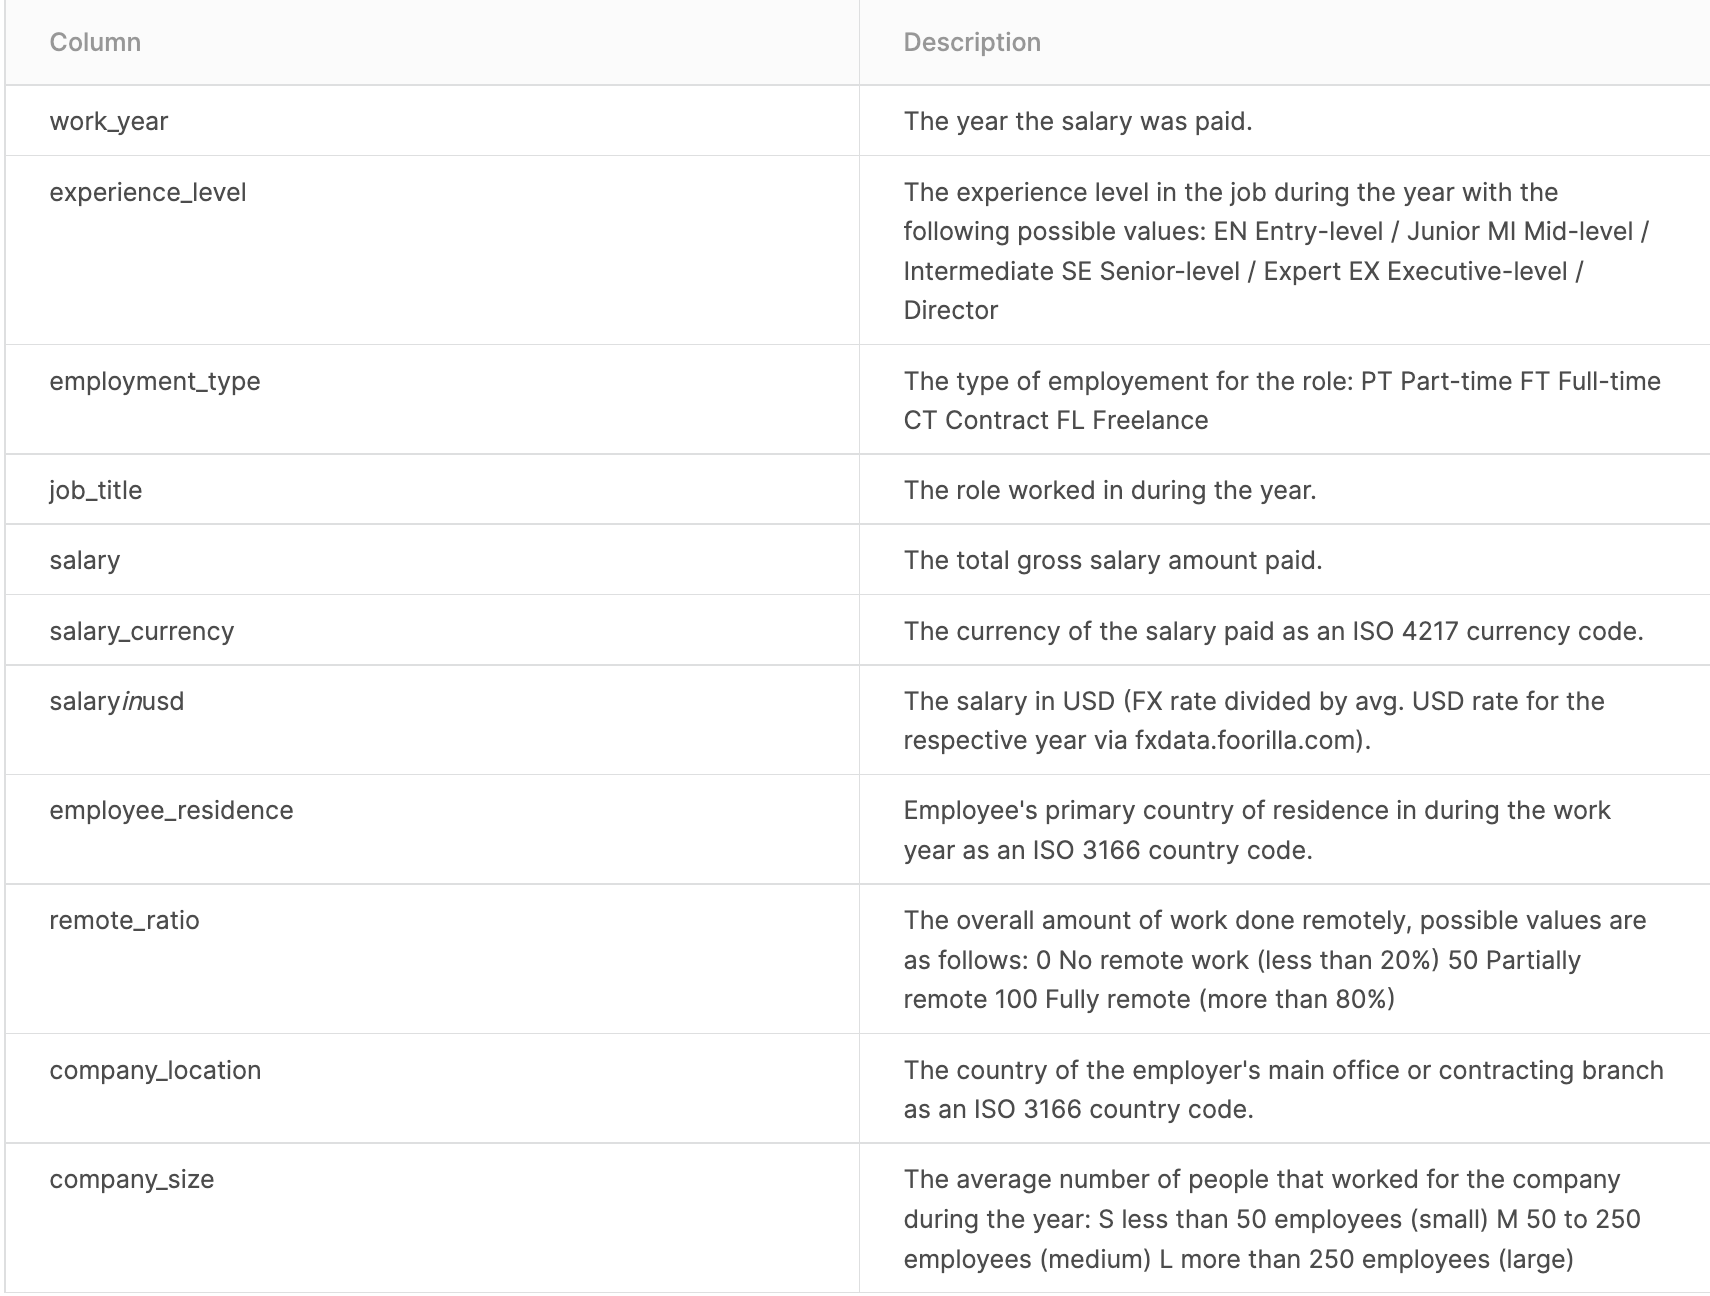

In [3]:
data = pd.read_csv('ds_salaries.csv', index_col=0)  # считываем данные
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.info();  # информация о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Видим, что признаки work_year, salary, salary_in_usd, remote_ratio являются числовыми, остальные — категориальными

Создаем новую бинарную переменную, богат ли человек, считаем что богат, если зарплата в долларах > 100000

In [7]:
data['is_rich'] = data['salary_in_usd'] > 100_000
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_rich
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,True
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,True
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True


Посчитаем, сколько всего людей и сколько из них богатых

In [50]:
f"Всего: {data.shape[0]}, богатых из них: {data['is_rich'].sum()}"

'Всего: 607, богатых из них: 305'

Получается, что половина опрошенных богаты

In [8]:
data.describe()  # посмотрим на статистики в данных

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


Средняя 112297.869852, минимальная зарплата 2859.000000 — возможно, работал part-time. Проверим это.

In [52]:
data.loc[data['salary_in_usd'] == 2859] 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_rich
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S,False


Data Scientist работал full-time.

Теперь посмотрим на зарплату независимо от страны, при этом покрасим бины в зависимости от опыта.

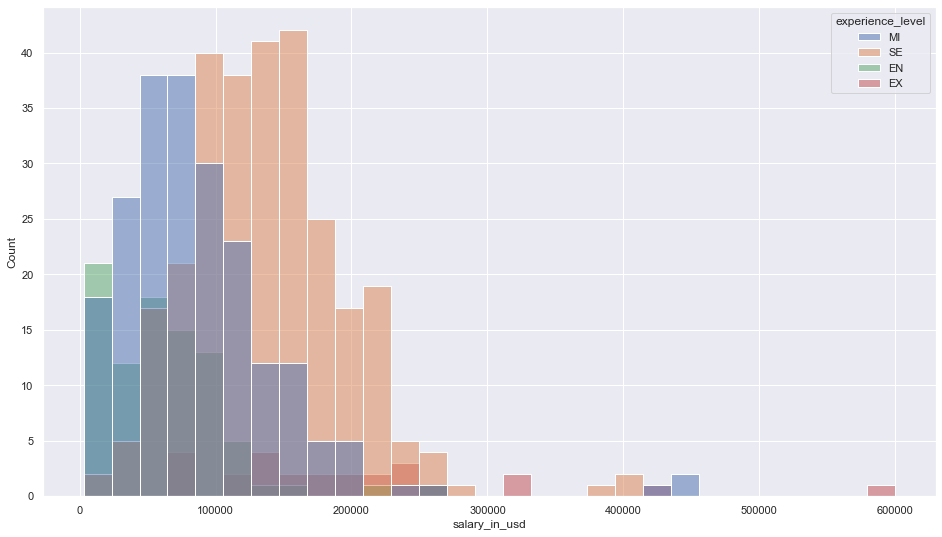

In [10]:
sns.histplot(data, x='salary_in_usd', hue='experience_level');

Смотрим на общее распределение зарплаты

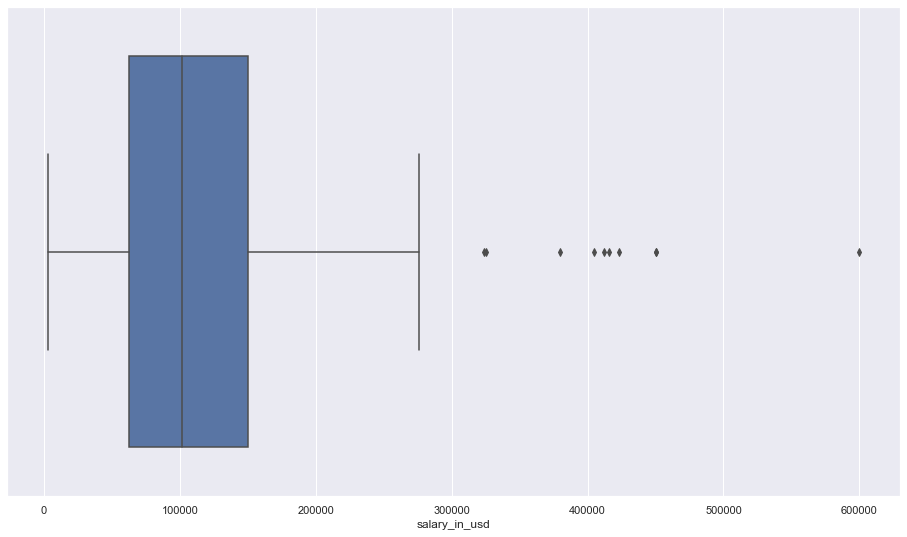

In [11]:
sns.boxplot(data=data, x='salary_in_usd');

По двум графикам выше видно, что присутствуют выбросы, при этом соответствие уровня зарплаты и количество опыта является ожидаемым, т.е. у более опытных разработчиков выше зарплата.

Посмотрим на матрицу корреляций числовых признаков.

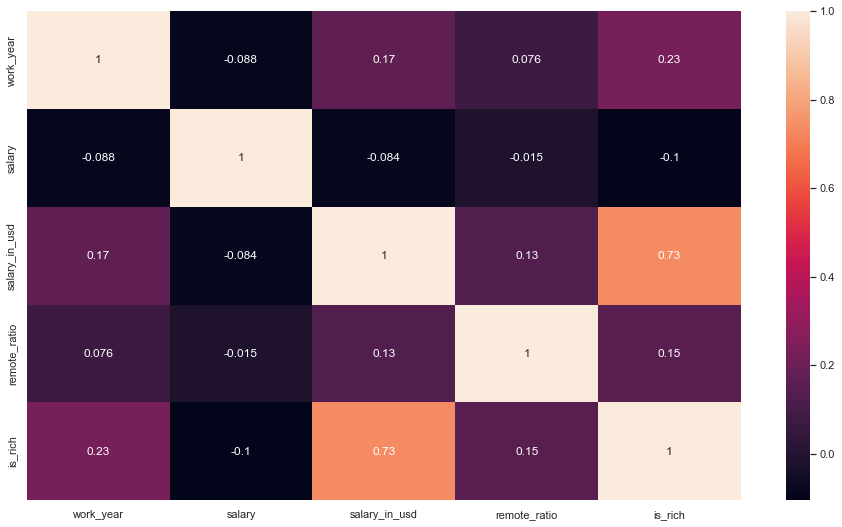

In [13]:
sns.heatmap(data.corr(), annot=True);

Заметим, что нет корреляции между remote_ratio и salary, между остальными признаками корреляция также не была найдена, что и было ожидаемо (кроме добавленной нами переменной). Это означает, что уровень зарплаты не зависит от того, работает ли разработчик удаленно или нет.

В датасете присутствую данные о зарплатах в разных странах, компаниях, с разным опытом. Чтобы наглядно посмотреть на разницу в медианной зарплате, посмотрим на разные графики

In [14]:
data_countries_salaries_all = data.groupby('company_location').filter(lambda x: len(x) > 10)  # группируем компании по странам и оставляем только те страны, в которых больше 10 компаний
sorted_salaries = data_countries_salaries_all.groupby(['company_location'])['salary_in_usd'].median().sort_values()  # возьмем медианы зарплаты в каждой стране и отсортируем

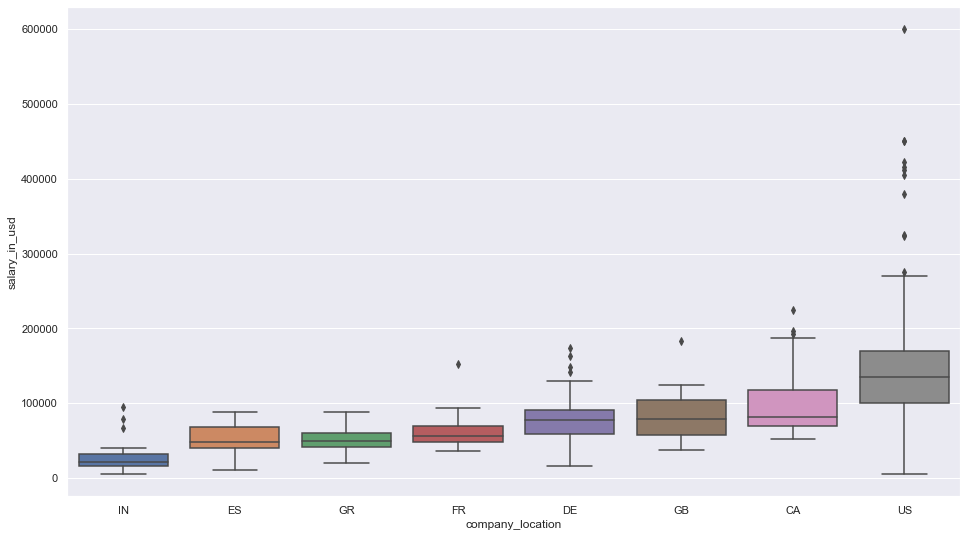

In [16]:
sns.boxplot(x='company_location', y='salary_in_usd', data=data_countries_salaries_all, order=list(sorted_salaries.index));  # строим сам график

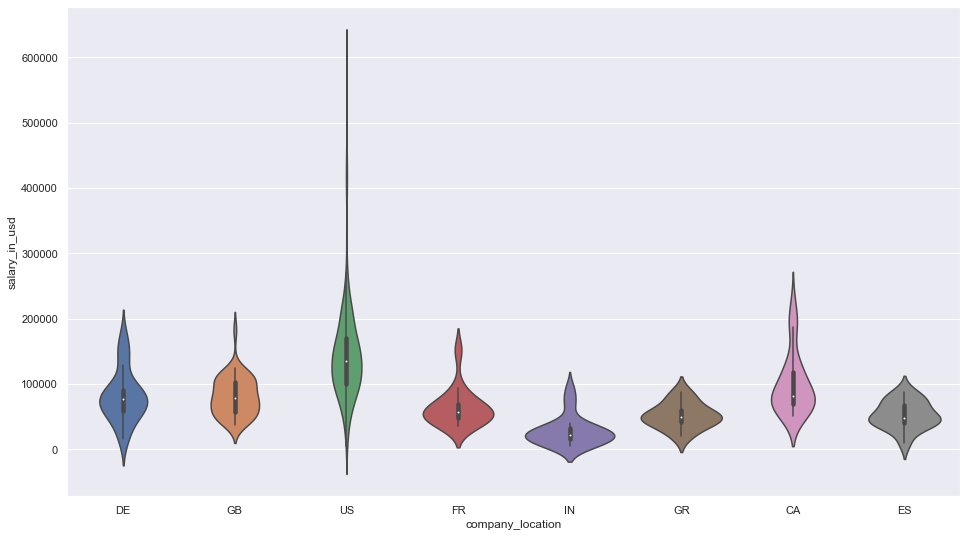

In [17]:
sns.violinplot(x='company_location', y='salary_in_usd', data=data_countries_salaries_all);

По box plot и violin plot можно увидеть, что медиана в US выше, чем в других странах. Делаем вывод, что медианная зарплата в US выше, чем в других странах.

Построим strip plot и покрасим в разные цвета работников с разным уровнем опыта. 

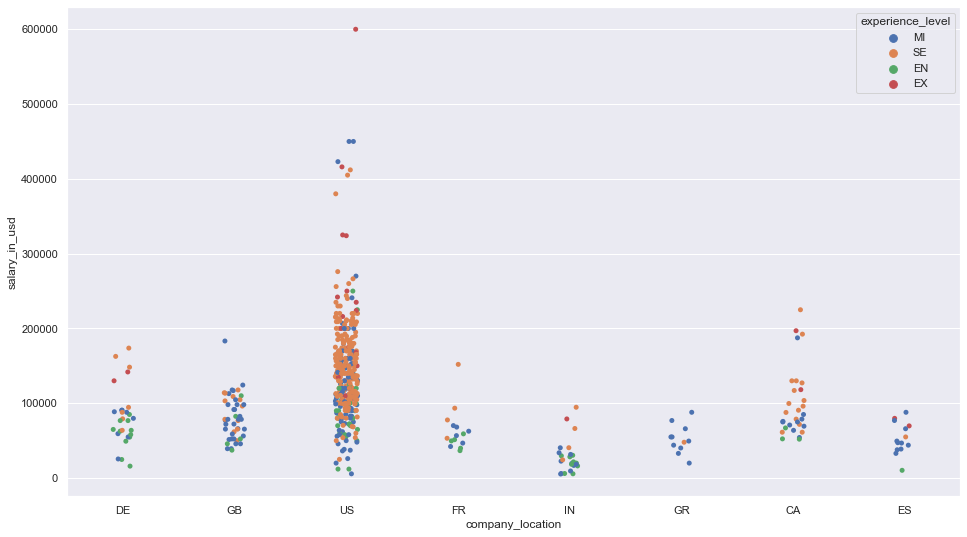

In [18]:
sns.stripplot(x='company_location', y='salary_in_usd', hue='experience_level', data=data_countries_salaries_all);

По strip plot замечаем, что для US представлено намного больше данных. Также можно заметить, что в US находится больше всего выбросов.

При этом получаем ожидаемую картину по уровню опыта, ниже всего – зеленые – entry level, далее – синие – middle, оранжевые – senior, красные – executive.

Построим pie chart и count plot, чтобы посмотреть в процентах и увидеть наглядно, какое количество опрошенных приходится на US.

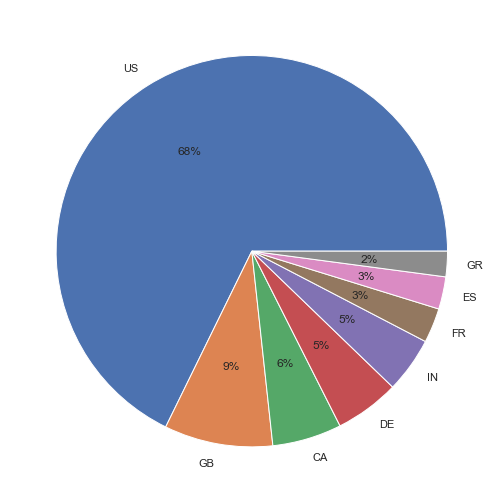

In [21]:
tmp = data_countries_salaries_all['company_location'].value_counts()  # считаем количество опрошенных по странам
plt.pie(tmp, labels=tmp.index, autopct="%.0f%%");

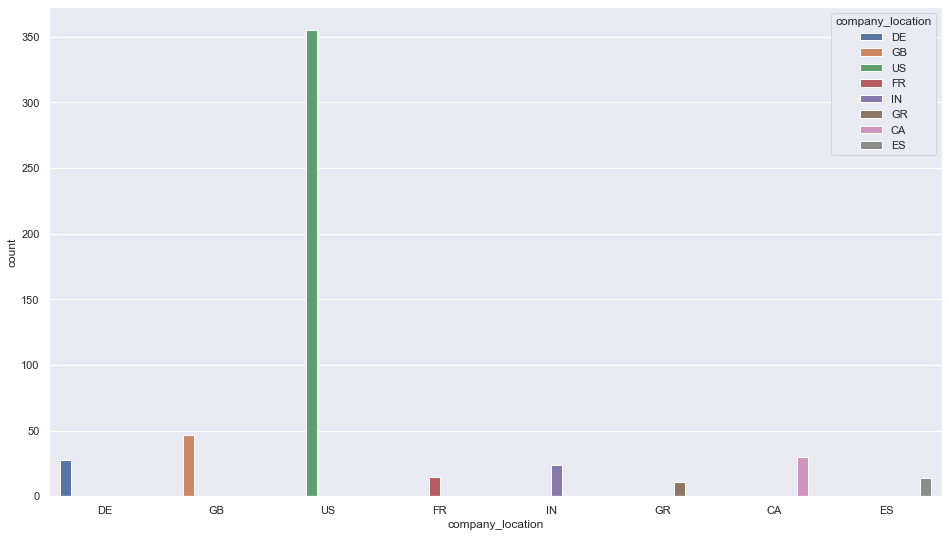

In [22]:
sns.countplot(x='company_location', hue='company_location', data=data_countries_salaries_all);

Избавимся от выбросов, которые были замечены ранее, чтобы получить более хорошие оценки среднего

Выбросим все записи с зарплатой >= 300 000. Также оставим только full-time работников. Здесь и далее цвет бинов зависит от опыта, если не обговорено другое.

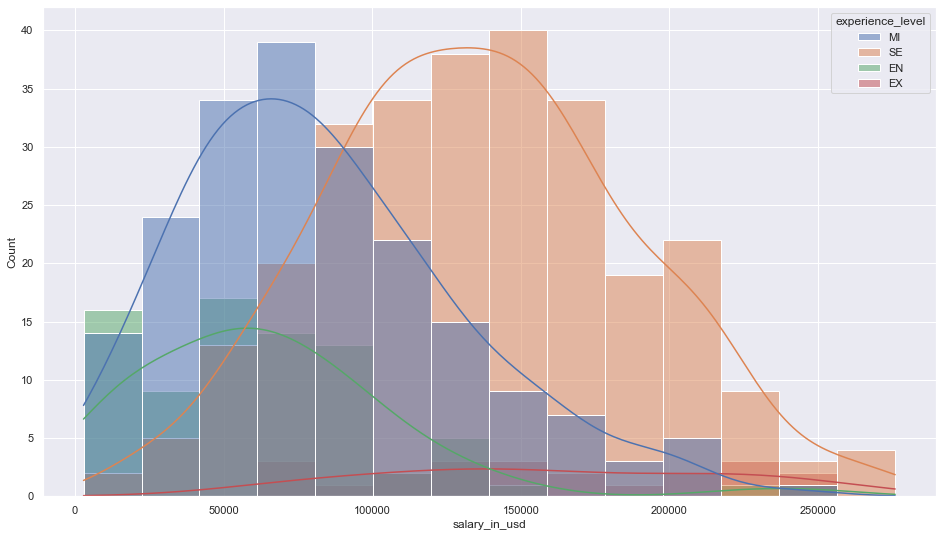

In [24]:
data_edit = data.loc[(data['salary_in_usd'] < 300_000) & (data['employment_type'] == 'FT')]
sns.histplot(data_edit, x='salary_in_usd', kde=True, hue='experience_level');

Построим несколько гистограмм с разным количеством столбцов, чтобы предположить, из какого распределения взята выборка зарплат.

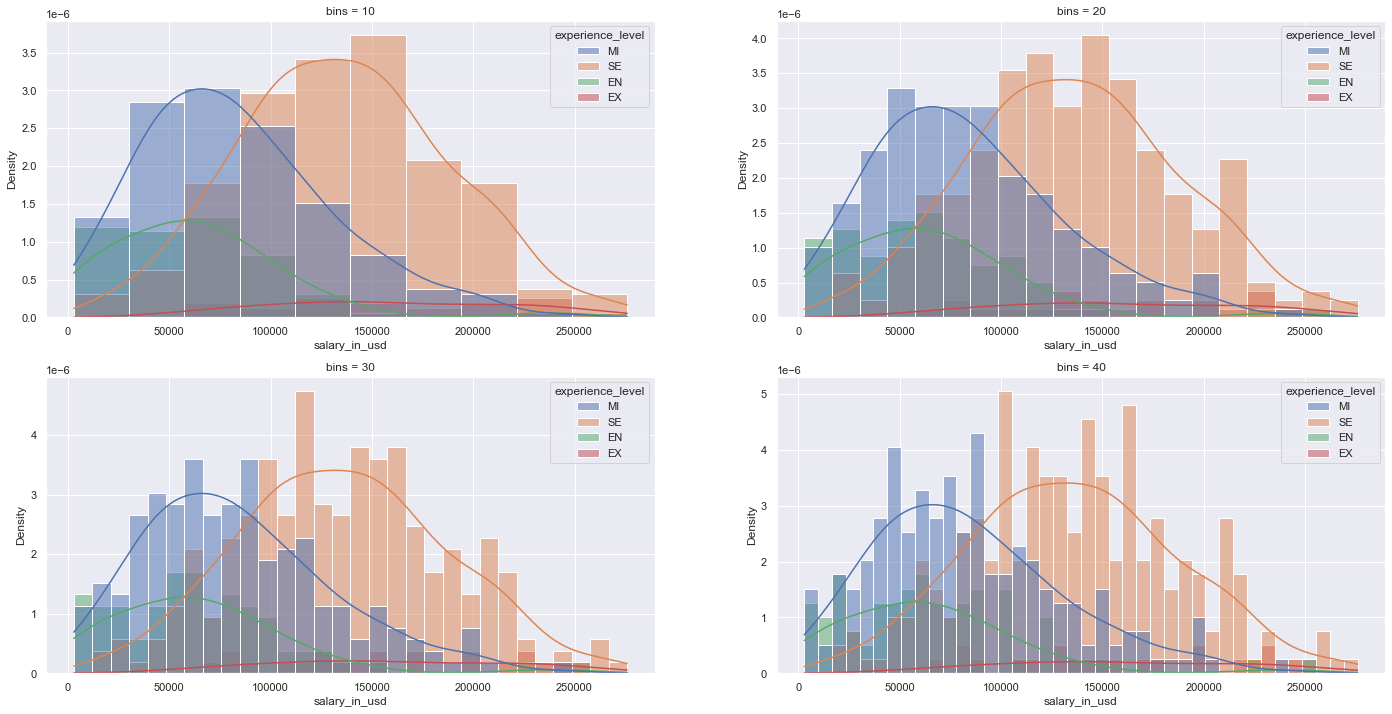

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24, 12))
bins_list = [10, 20, 30, 40]
for bins, ax in zip(bins_list, axes.flat):
    sns.histplot(data_edit, x='salary_in_usd', hue='experience_level', ax=ax, bins=bins, kde=True, stat='density', alpha=0.5)
    ax.set_title(f'bins = {bins}')
plt.show();

Распределение не похоже на нормальное, оно скорее смещено влево, проверим это с помощью критерия Шапиро-Уилка

In [27]:
print(f"p-value полученное тестом Шапиро-Уилка = {shapiro(data_edit['salary_in_usd'])[1]}")

p-value полученное тестом Шапиро-Уилка = 3.544724904713803e-07


Таким образом отвергаем нулевую гипотезу о нормальном распределении зарплат после удаления выбросов.

Больше половины людей взяты из США. Проверим гипотезу о нормальности распределения зарплат в США и других странах с достаточным количеством записей.

In [28]:
countries = ['US', 'GB', 'DE', 'FR', 'IN', 'CA']
for c in countries:
    print(f"Страна: {c}, p-value: {shapiro(data_edit.loc[data_edit['company_location'] == c]['salary_in_usd'])[1]}")

Страна: US, p-value: 0.0973987951874733
Страна: GB, p-value: 0.01408962719142437
Страна: DE, p-value: 0.02592536434531212
Страна: FR, p-value: 0.0015115817077457905
Страна: IN, p-value: 0.0007228011963889003
Страна: CA, p-value: 0.00023443115060217679


На уровне значимости $\alpha = 0.05$ гипотеза о нормальном распределении не отвергается только для США. Посмотрим на гистограмму.

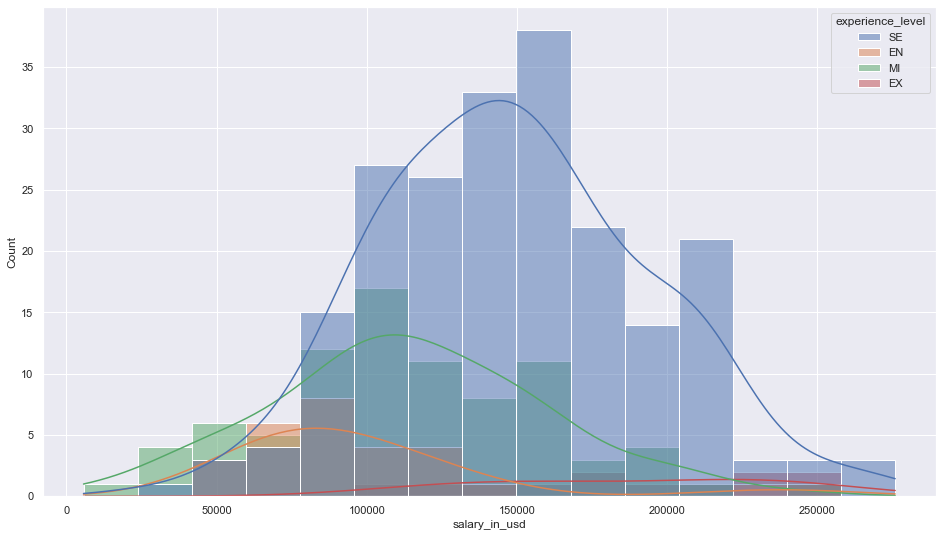

In [29]:
sns.histplot(data_edit.loc[data_edit['company_location'] == 'US'], x='salary_in_usd', kde=True, hue='experience_level');

Т.к. для США больше записей, чем для других стран, то сравнивать среднюю зарплату США и, например, Германии, не было бы корректно. Поэтому сравним средние зарплаты в Германии и Англии. Для этого воспользуемся Welch's t-тестом для независимых выборок.

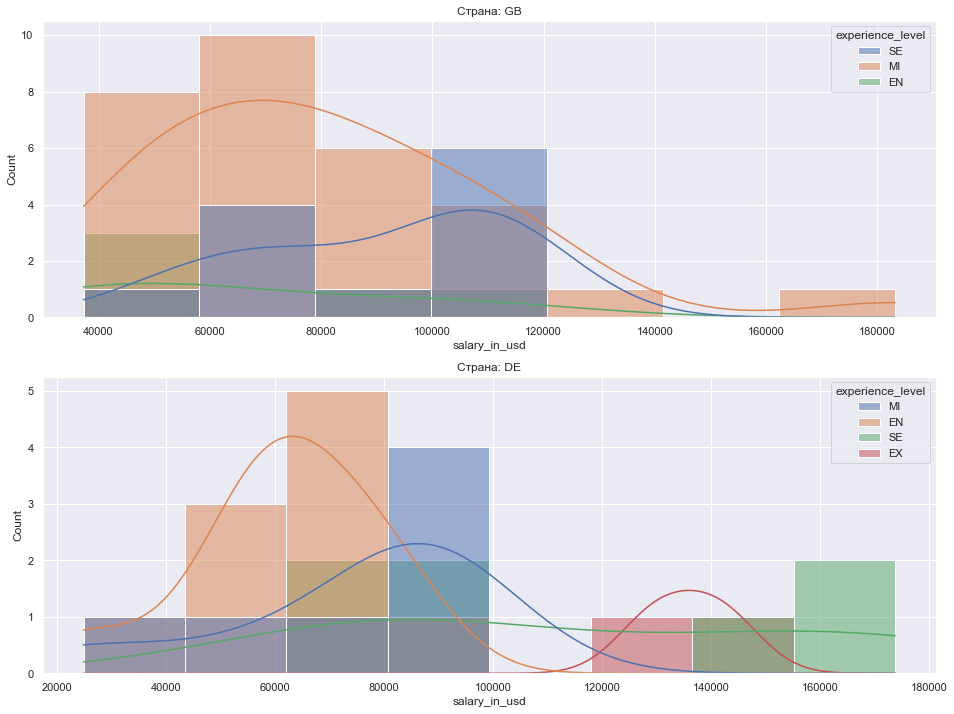

In [31]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(16, 12))

salaries = []

for c, ax in zip(['GB', 'DE'], axes.flat):
    salaries.append(data_edit.loc[data_edit['company_location'] == c])
    sns.histplot(salaries[-1], x='salary_in_usd', hue='experience_level', ax=ax, kde=True, )
    ax.set_title(f'Страна: {c}')
    
plt.show();

In [32]:
print(f"p-value: {ttest_ind(*[s['salary_in_usd'] for s in salaries], alternative='less', equal_var=False)[1]}")

p-value: 0.32738884744236063


Таким образом, мы не отвергаем гипотезу о равенстве средних зарплат в Германии и Англии в пользу альтернативы, что в Англии зарплата меньше.

В данных также присутствует признак, который показывает опыт Data Scientist

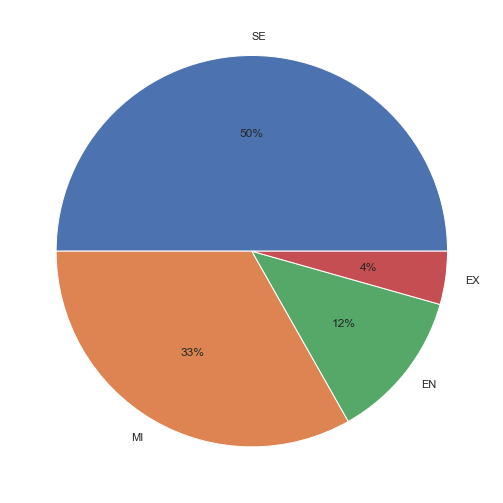

In [33]:
tmp = data_countries_salaries_all['experience_level'].value_counts()
plt.pie(tmp, labels=tmp.index, autopct="%.0f%%");

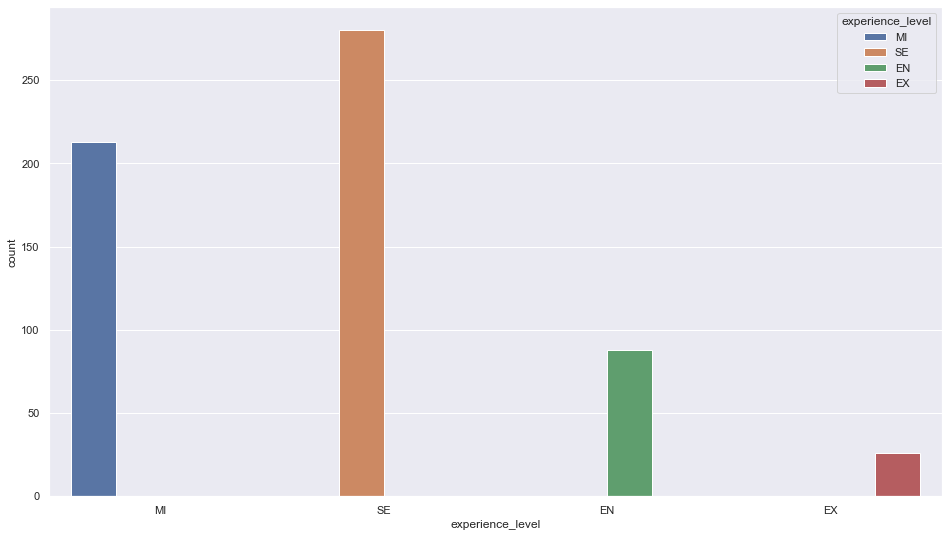

In [34]:
sns.countplot(x='experience_level', hue='experience_level', data=data);

Сравним средние зарплаты у senior и middle разработчиков из США, проведем Welch's t-тест для независимых выборок с альтернативой, что у senior дсов зарплата больше. 

In [55]:
salaries_se_usa = (data_edit
                   .loc[(data_edit['company_location'] == 'US') & (data_edit['experience_level'] == 'SE')]['salary_in_usd'])  # выбираем зарплаты senior разработчиков из США
salaries_mi_usa = (data_edit
                   .loc[(data_edit['company_location'] == 'US') & (data_edit['experience_level'] == 'MI')]['salary_in_usd'])  # выбираем зарплаты middle разработчиков из США
print(f"p-value: {ttest_ind(salaries_se_usa, salaries_mi_usa, alternative='greater', equal_var=False)[1]}")

p-value: 1.3053780888500699e-08


Мы можем отвергнуть гипотезу о равенстве средних зарплат у senior и middle дсов. Посмотрим на гистограммы. 

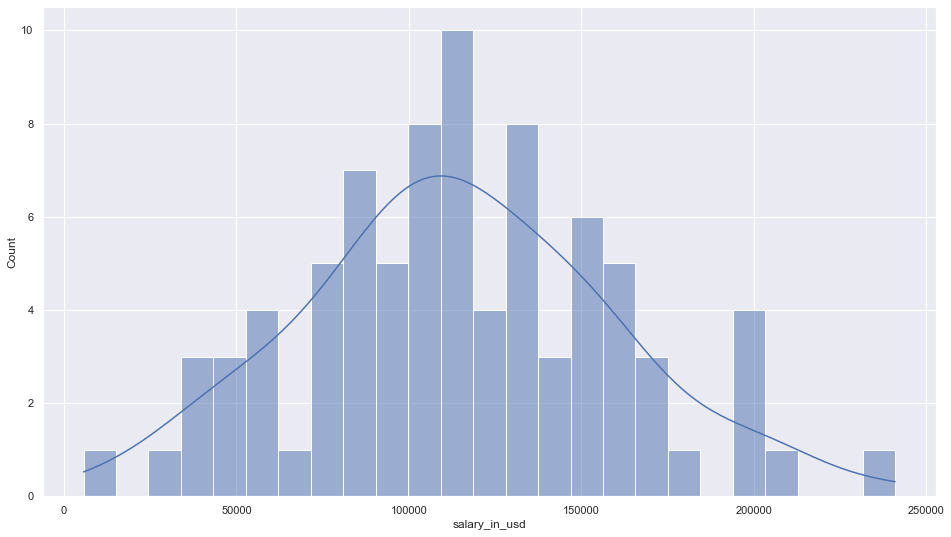

In [36]:
sns.histplot(salaries_mi_usa, kde=True, bins=25);

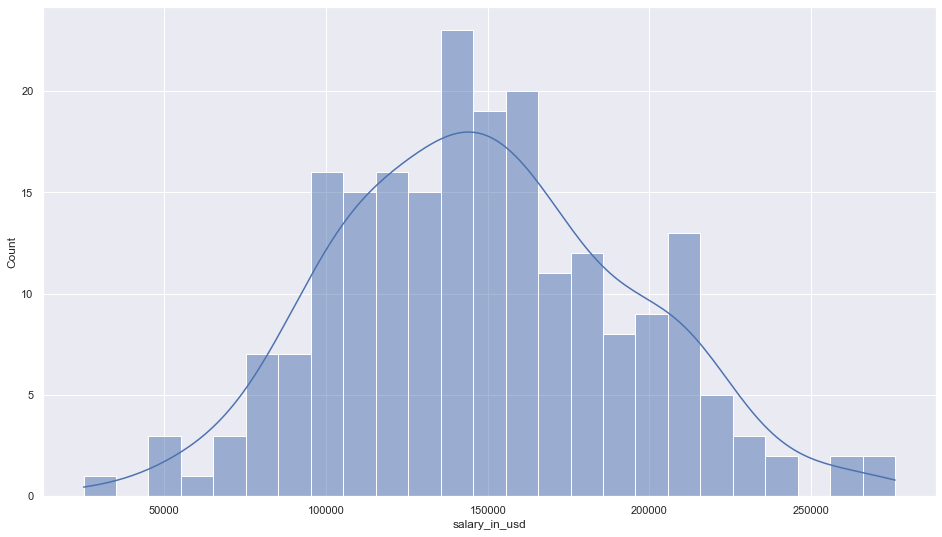

In [37]:
sns.histplot(salaries_se_usa, kde=True, bins=25);

In [56]:
print(f'Количество записей для senior разработчиков: {len(salaries_se_usa)},\n\
Количество записей для middle разработчиков: {len(salaries_mi_usa)}')

Количество записей для senior разработчиков: 213,
Количество записей для middle разработчиков: 84


Senior разработчиков в два с половиной раза больше, попробуем случайно взять из всех 84 записи и проведем новый тест.

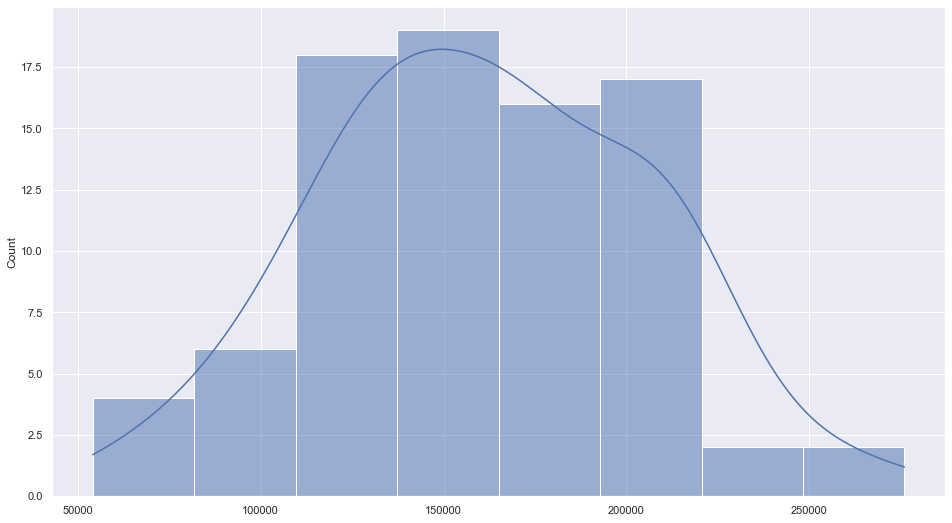

In [39]:
salaries_se_usa_small = np.random.choice(salaries_se_usa, len(salaries_mi_usa))
sns.histplot(salaries_se_usa_small, kde=True);

In [40]:
print(f"p-value: {ttest_ind(salaries_se_usa_small, salaries_mi_usa, equal_var=False, alternative='greater')[1]}")

p-value: 1.1161161787080015e-10


Даже при равных размерах выборок мы можем отвергнуть гипотезу о равенстве зарплат. Вспомним, что до этого мы выкинули выбросы. Проведем тест заново на исходных данных, но только учитывая full-time работников.

In [42]:
salaries_se_usa_ft = (data
                      .loc[(data['company_location'] == 'US') & (data['experience_level'] == 'SE') 
                           & (data['employment_type'] == 'FT')]['salary_in_usd'])
salaries_mi_usa_ft = (data
                      .loc[(data['company_location'] == 'US') & (data['experience_level'] == 'MI') 
                           & (data['employment_type'] == 'FT')]['salary_in_usd'])
print(f"p-value: {ttest_ind(salaries_se_usa_ft, salaries_mi_usa_ft, equal_var=False, alternative='greater')[1]}")

p-value: 0.0015731649356738198


По исходным данным с выбросами все еще получается стат. значимая разница средних. Попробуем выбрать случайным образом одинаковое количество.

In [43]:
salaries_se_usa_ft_small = np.random.choice(salaries_se_usa_ft, len(salaries_mi_usa_ft))
print(f"p-value: {ttest_ind(salaries_se_usa_ft_small, salaries_mi_usa_ft, equal_var=False, alternative='greater')[1]}")

p-value: 0.002195768493336242


Получили стат. значимую разницу, значит гипотезу можно смело отвергнуть при $\alpha=0.05$.

Напоследок проверим разницу зарплат в M (средних) и L (больших компаниях).

In [44]:
large_company_salaries = data_edit.loc[data_edit['company_size'] == 'L']
medium_company_salaries = data_edit.loc[data_edit['company_size'] == 'M']

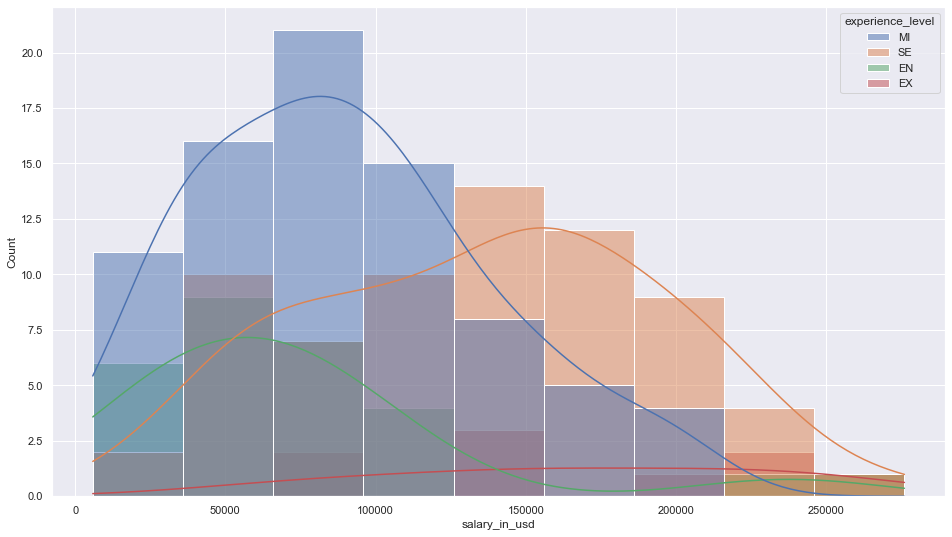

In [45]:
sns.histplot(large_company_salaries, x='salary_in_usd', kde=True, hue='experience_level');

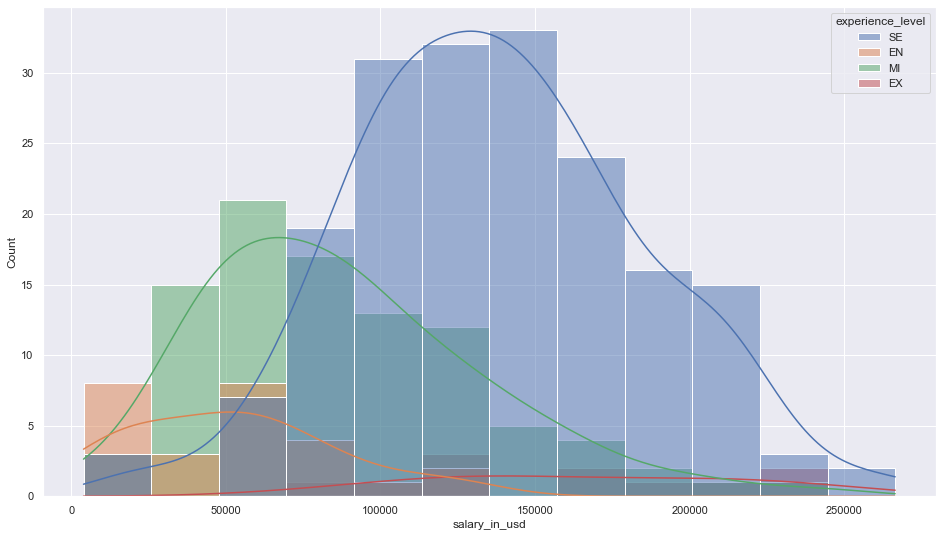

In [46]:
sns.histplot(medium_company_salaries, x='salary_in_usd', kde=True, hue='experience_level');

По гистограммам кажется, что у компаний большого размера средняя зарплата меньше. Проверим это с помощью Welch's t-test.

In [47]:
print(f"p-value: {ttest_ind(medium_company_salaries['salary_in_usd'], large_company_salaries['salary_in_usd'], equal_var=False, alternative='greater')[1]}")

p-value: 0.050906874835409385


На уровне значимость $\alpha=0.05$ не можем отвергнуть гипотезу о равенстве средних зарплат в больших и средних компаниях в пользу альтернативы, что в средних компаниях зарплата больше.



Выводы, которые можно сделать по этим данным:
1. По миру зарплата Data Scientists распределена не нормально, то есть "бедных" Data Scientists больше, чем "богатых".
2. В Америке распределение зарплат имеет нормальное распределение.
3. В Англии средняя зарплата у Data Scientists такая же, как в Германии.
4. В США у middle Data Scientists зарплата меньше, чем у senior.
5. В компаниях среднего размера средняя зарплата такая же, как в компаниях большого размера.